# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [12]:
df=pd.read_csv(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\Machine_Learning\2-No_Supervisado\1-PCA\Practica\data\comprar_alquilar.csv")
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [14]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Estandarizar los datos
df_estandarizado = scaler.fit_transform(df)

# Convertir el resultado en un nuevo DataFrame
df_estandarizado = pd.DataFrame(df_estandarizado, columns=df.columns)

# Mostrar el DataFrame estandarizado
print(df_estandarizado)


     ingresos  gastos_comunes  pago_coche  gastos_otros   ahorros  vivienda  \
0    0.620129        0.104689   -1.698954      0.504359  0.649475  0.195910   
1    1.063927       -0.101625   -0.712042     -0.515401  0.259224  1.937370   
2    0.891173        0.226266   -0.912634      1.667244  1.080309 -0.379102   
3    1.274209        1.128886   -1.578599     -1.559015  0.909604  2.114062   
4    0.719611       -0.400042    0.090326      0.027279  0.159468 -0.179497   
..        ...             ...         ...           ...       ...       ...   
197 -0.671949       -1.037402    1.125381     -0.163554 -1.617963 -0.075199   
198 -0.594508        0.215214    0.467439     -0.241079 -0.973876 -0.683130   
199 -1.057368       -0.061099    0.515581      1.005294 -0.183849  0.107880   
200 -0.968013       -0.385305    1.261783      0.814462 -1.083273  0.026040   
201 -0.578424        0.683102   -0.856468     -0.795686 -1.545397 -0.851037   

     estado_civil     hijos   trabajo   comprar  
0

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [16]:
# Crea una instancia de PCA con el número deseado de componentes
n_components = 9  # Número de componentes principales
pca = PCA(n_components=n_components)

# Ajusta el modelo PCA a los datos estandarizados
pca.fit(df_estandarizado)

# Transforma los datos en las nuevas coordenadas PCA
pca_features = pca.transform(df_estandarizado)


### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [17]:
# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente principal
for i, var in enumerate(explained_variance):
    print(f"Varianza explicada por PC{i+1}: {var:.4f}")


Varianza explicada por PC1: 0.2737
Varianza explicada por PC2: 0.2396
Varianza explicada por PC3: 0.1099
Varianza explicada por PC4: 0.1041
Varianza explicada por PC5: 0.0911
Varianza explicada por PC6: 0.0735
Varianza explicada por PC7: 0.0458
Varianza explicada por PC8: 0.0275
Varianza explicada por PC9: 0.0247


In [18]:
# Obtener la varianza acumulada a partir del primer componente principal
cumulative_variance = np.cumsum(explained_variance)

# Imprimir la varianza acumulada
for i, var in enumerate(cumulative_variance):
    print(f"Varianza acumulada hasta PC{i+1}: {var:.4f}")


Varianza acumulada hasta PC1: 0.2737
Varianza acumulada hasta PC2: 0.5133
Varianza acumulada hasta PC3: 0.6232
Varianza acumulada hasta PC4: 0.7273
Varianza acumulada hasta PC5: 0.8183
Varianza acumulada hasta PC6: 0.8919
Varianza acumulada hasta PC7: 0.9377
Varianza acumulada hasta PC8: 0.9651
Varianza acumulada hasta PC9: 0.9898


In [23]:
# Obtener la varianza explicada por los primeros 5 componentes principales
variance_5_components = np.sum(explained_variance[:5])

# Imprimir la varianza explicada por los primeros 5 componentes principales
print(f"Varianza explicada por los primeros 5 componentes: {variance_5_components:.4f}")


Varianza explicada por los primeros 5 componentes: 0.8183


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

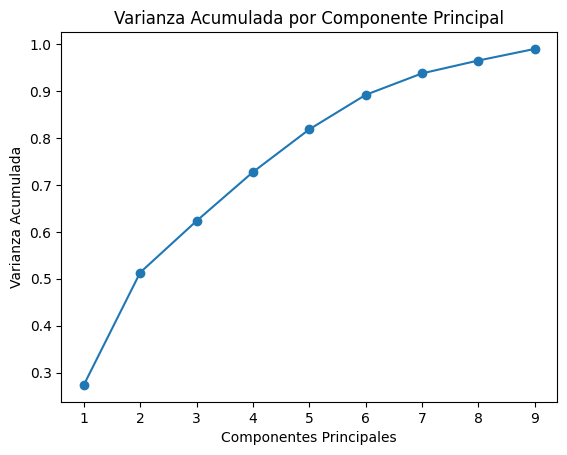

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la varianza acumulada a partir del primer componente principal
cumulative_variance = np.cumsum(explained_variance)

# Crear el diagrama de líneas
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')

# Establecer etiquetas y título del gráfico
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por Componente Principal')

# Mostrar el gráfico
plt.show()


### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

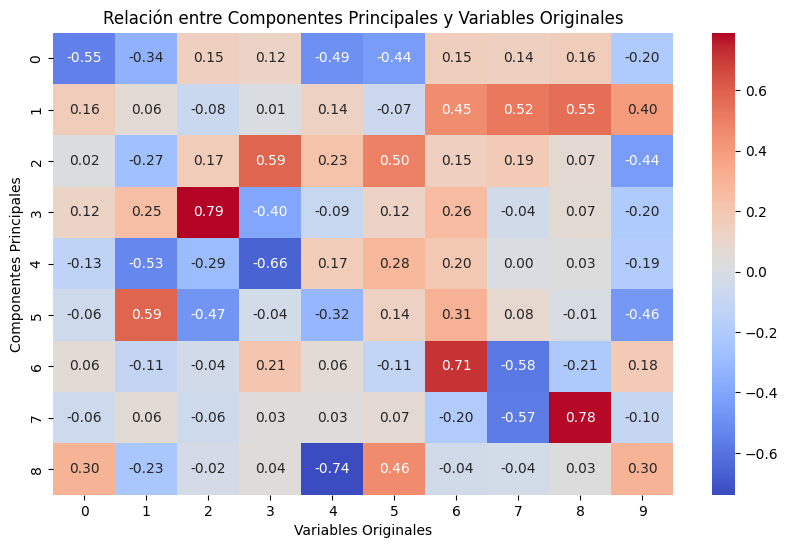

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los componentes principales del PCA
pca_components = pca.components_

# Crear un DataFrame para visualizar los resultados
df_components = pd.DataFrame(pca_components)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_components, cmap='coolwarm', annot=True, fmt=".2f")

# Establecer etiquetas y título del gráfico
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.title('Relación entre Componentes Principales y Variables Originales')

# Mostrar el mapa de calor
plt.show()


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
X = df.drop('comprar',1)
y = df['comprar']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

c:\Users\Abraham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [38]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

# Paso 2: Preparar el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Paso 3: Entrenar el modelo
X = df.drop('comprar', axis=1)  # Features
y = df['comprar']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Dividir en conjunto de entrenamiento y prueba

pipeline.fit(X_train, y_train)

# Paso 4: Realizar predicciones en el conjunto de prueba
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Paso 5: Calcular el accuracy score en train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy en el conjunto de entrenamiento:", train_accuracy)
print("Accuracy en el conjunto de prueba:", test_accuracy)

# Paso 6: Representar la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión:")
print(confusion_mat)

# Paso 7: Encontrar la combinación que mejora el accuracy en test
best_accuracy = 0
best_neighbors = 0
best_components = 0

for n_neighbors in range(1, 10):
    for n_components in range(1, 6):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_components)),
            ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
        ])
        pipeline.fit(X_train, y_train)
        y_test_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_neighbors = n_neighbors
            best_components = n_components

print("La combinación que mejora el accuracy en test es:")
print("Vecinos:", best_neighbors)
print("Componentes:", best_components)

# Paso 8: Guardar el modelo
joblib.dump(pipeline, 'modelo.pkl')


Accuracy en el conjunto de entrenamiento: 0.9130434782608695
Accuracy en el conjunto de prueba: 0.7560975609756098
Matriz de confusión:
[[21  3]
 [ 7 10]]
La combinación que mejora el accuracy en test es:
Vecinos: 1
Componentes: 3


['modelo.pkl']

Guarda el modelo

In [40]:
import pickle


# Guardar el modelo utilizando pickle
with open('modelo.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

